In [2]:
import gym
import gym_ple
import gym_tetris
import ple
import pred_learn

In [3]:
import torch
from skimage.transform import resize
import os
import numpy as np

In [4]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [6]:
MAX_STEPS = 500
TOTAL_STEPS = 10000
ENVS = [
    "CarRacing-v0",
    "Snake-ple-v0",
    "Tetris-v0",
    "PuckWorld-ple-v0",
    "WaterWorld-ple-v0",
    "PixelCopter-ple-v0",
    "CubeCrash-v0",
    "Catcher-ple-v0",
    "Pong-ple-v0",
]
ENV_ID = ENVS[-1]
RECORD_DIR = "recorded/{}/".format(ENV_ID)
FILE_NO = 1

extra_args = pred_learn.data.EXTRA_ARGS.get(ENV_ID, {})

try:
    os.makedirs(RECORD_DIR)
except FileExistsError:
    pass

In [7]:
# env = gym.make("MountainCar-v0")
# env = gym_ple.make(ENV_ID, width=64, height=64)
env = gym_ple.make(ENV_ID, **extra_args)
# env = gym_tetris.make("Tetris-v0")
env.render = False

/home/ira/code/cool-code/gym/gym/logger.py:30: UserWarning: WARN: Environment '<class 'gym_ple.ple_env.PLEEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [8]:
record = []
while len(record) < 1000:
    obs = env.reset()
    for i in range(MAX_STEPS):
        timestep = {}
        timestep["s0"] = np.copy(obs)
        action = env.action_space.sample()
        timestep["a0"] = np.copy(action)

        obs, rew, done, info = env.step(action)
        timestep["r1"] = rew
        timestep["terminal"] = done
        record.append(timestep)

        if done:
            break


reward -1.0
action 2


KeyboardInterrupt: 

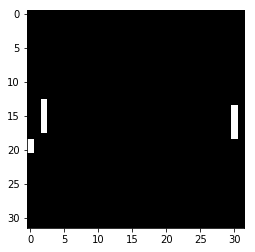

In [9]:
# replay record
for timestep in record:
    clear_output(True)
#     obs = resize(obs, (64, 64))
    plt.imshow(timestep["s0"])
    print("reward", timestep['r1'])
    print("action", timestep['a0'])
    plt.pause(0.02)

In [8]:
torch.save(record, "{}/{}.torch".format(RECORD_DIR, FILE_NO))

In [9]:
loaded = torch.load("{}/{}.torch".format(RECORD_DIR, FILE_NO))

In [10]:
loaded = torch.load("../deep_track/data/recorded/Tetris-v0/0.torch")

FileNotFoundError: [Errno 2] No such file or directory: '../deep_track/data/recorded/Tetris-v0/0.torch'